In [1]:
%matplotlib inline

import numpy as np
from __future__ import division

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
#pylab.rcParams['figure.figsize'] = 4*4, 3*4 
pylab.rcParams['axes.grid'] = False
import seaborn as sns

import cv2
print cv2.__version__

import logging
logger = logging.getLogger()

3.0.0


第1章 色彩、对比度和通道
===========


### 1.1 难以取舍
色彩 VS 对比度


### 1.2 让色彩更自然
人眼与相机的区别：

1. 色偏：物体受环境光影响而产生不自然的色调时，
   + 人眼自动纠正（人总是把环境光的颜色看成是中性灰）。   
   + 相机忠实记录。   
   
   冷色色偏很少能让人接受，而暧色色偏有时是讨喜的。    
   
   补充：显示器修色时，不会注意到色偏；制成印刷品时，才会发现色偏。
      
2. 同时对比效应（存在背景色时）
   + 人眼会夸大前景色和背景色的差别（视觉错觉迫使前景色朝着与背景色相反的方向发展）。    
   + 相机拍摄的照片常常充满**近似色**，缺乏对比。   
   
3. 色适应：
   + 人眼会快速适应不同的灯光强度。    
   + 人眼会自动减少反射光和闪烁光（相机常见到人物脸上满是反光）。 $\implies$ 室内肖像摄影时化浓妆。

4. 其他人眼视觉错觉：
   + 人眼注视一个对象时，它的对比度增强，周围次要景物的对比度降低。
   + 人对自己不感兴趣的背景的色彩感知能力会减弱。
   + 对象的色彩越鲜艳，它与背景的对比就越鲜明。
   + 人眼看来，景物最暗的部分（即使是明快色彩的一部分）通常是无色的。    
     例子：绿色大衣的最暗皱褶，相机记录是深绿色。
 
 
迎合人类视错觉：    
减少色偏，抑制反光，让主体对象的色彩更丰富，让次要背景变灰。


### 1.4 军火库

本书只关注几个造成原稿和修正图间差异的问题：

1. 曲线。   
   确保完整的阶调范围，突出最重要区域的细节，避免颜色失真。
   
2. 通道混合。
   解决曲线不能解决的某些问题，最典型的用法是修补对比度弱的通道。
   
3. 锐化。

4. 高光和阴影。
   数码相机（不同于底片）为了加强中间调的对比度，会牺牲高光和阴影。高光和阴影变成极端的颜色，失去层次感。     
   “阴影/高光“命令获得最佳效果 $\gets$ 领会锐化滤镜的基本工作原理。

5. 滥用。
   1. 选区和蒙版。   
      合理使用场景：
      + 剪下局部，或者扩展背景。
      + 一张照片中有两处冲突光源。
      + 色彩置换（蓝衬衫 $\to$ 红衬衫）。

我们总是希望使用曲线可以解决图面问题，除非它确实不够用了，再补充其他命令。

### 颜色空间的基本知识 

#### 加色混合与减色混合
1. 颜色   
    眼睛感受到的色彩，本质是给定频率范围的光。

    + 主动发光体的颜色 = 其发出光谱    
      **加色混合**，即多种发光体（光线）重叠的光谱。     
      例子：显示器

    + 被动反射体的颜色 = 给定光谱 - 其吸收光谱    
      **减色混合**，即多种反射体混合后，剩下的不被吸收的光谱。     
      例子：调合颜料

2. 中性灰      
   人类对红光、蓝光、绿光最敏感，当它们以等量比例进入眼睛时，我们就看到了中性灰：即黑色，灰色和白色。
   


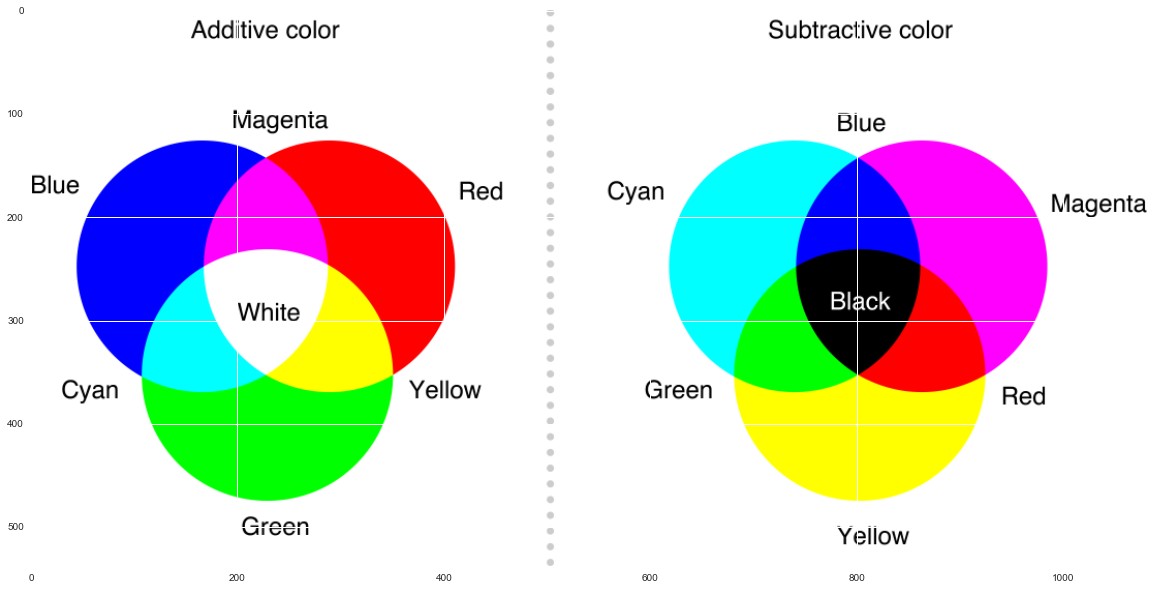

In [2]:
plt.figure(figsize=(20,20))
plt.imshow(plt.imread('./res/color_relation.png'))

#### 三种颜色空间
##### RGB
R - 红色，G - 绿色，B - 蓝色。

常用于显示，适用于加色混合（范围：0-255，值越高，发射光越多，颜色越亮 $\to$ 白色）

##### CMYK
C - 青色（互补：红色），M - 品红（互补：绿色），Y - 黄色（互补：蓝色），K - 黑色。

常用于印刷，适用于减色混合（范围：0% - 100%，值越高，颜料越多，吸收越强烈 $\to$ 黑色）     


##### LAB
L - 亮度，（0-100，黑 $\to$ 白）    
a\* - 绿色 $\to$ 品红 （-127 --- 127)    
b\* - 蓝色 $\to$ 黄色  (-127 --- 127)

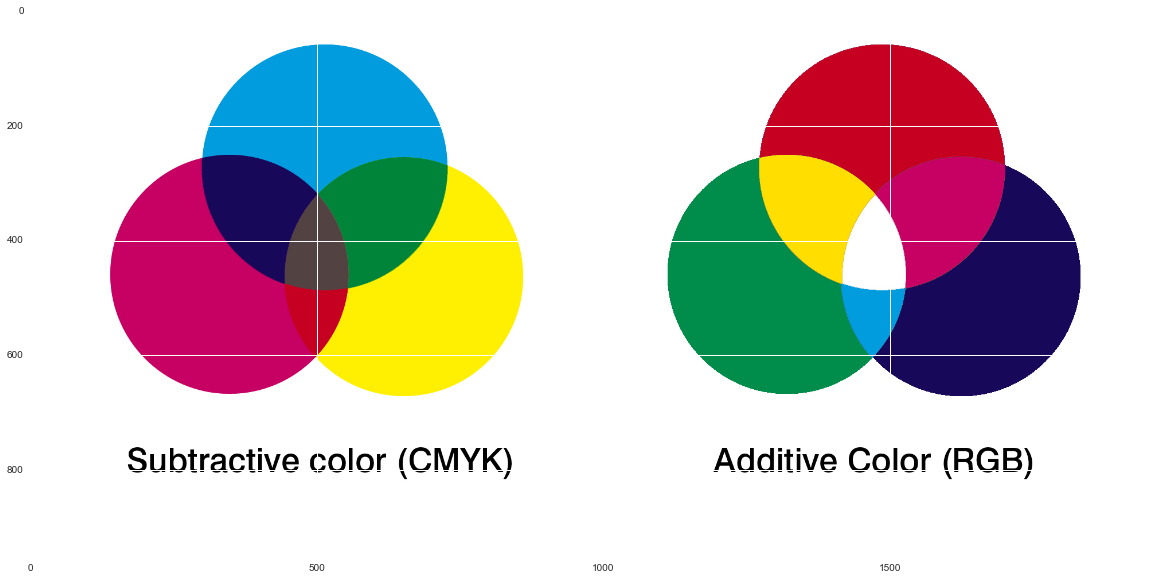

In [3]:
plt.figure(figsize=(20,20))
plt.imshow(plt.imread('./res/rgb_cmyk.jpg'))

### 1.6 通道测试

一束花的 10 个通道黑白图片，请推测各个通道的归属（RGB - 3, LAB - 3, CMYK - 4)。

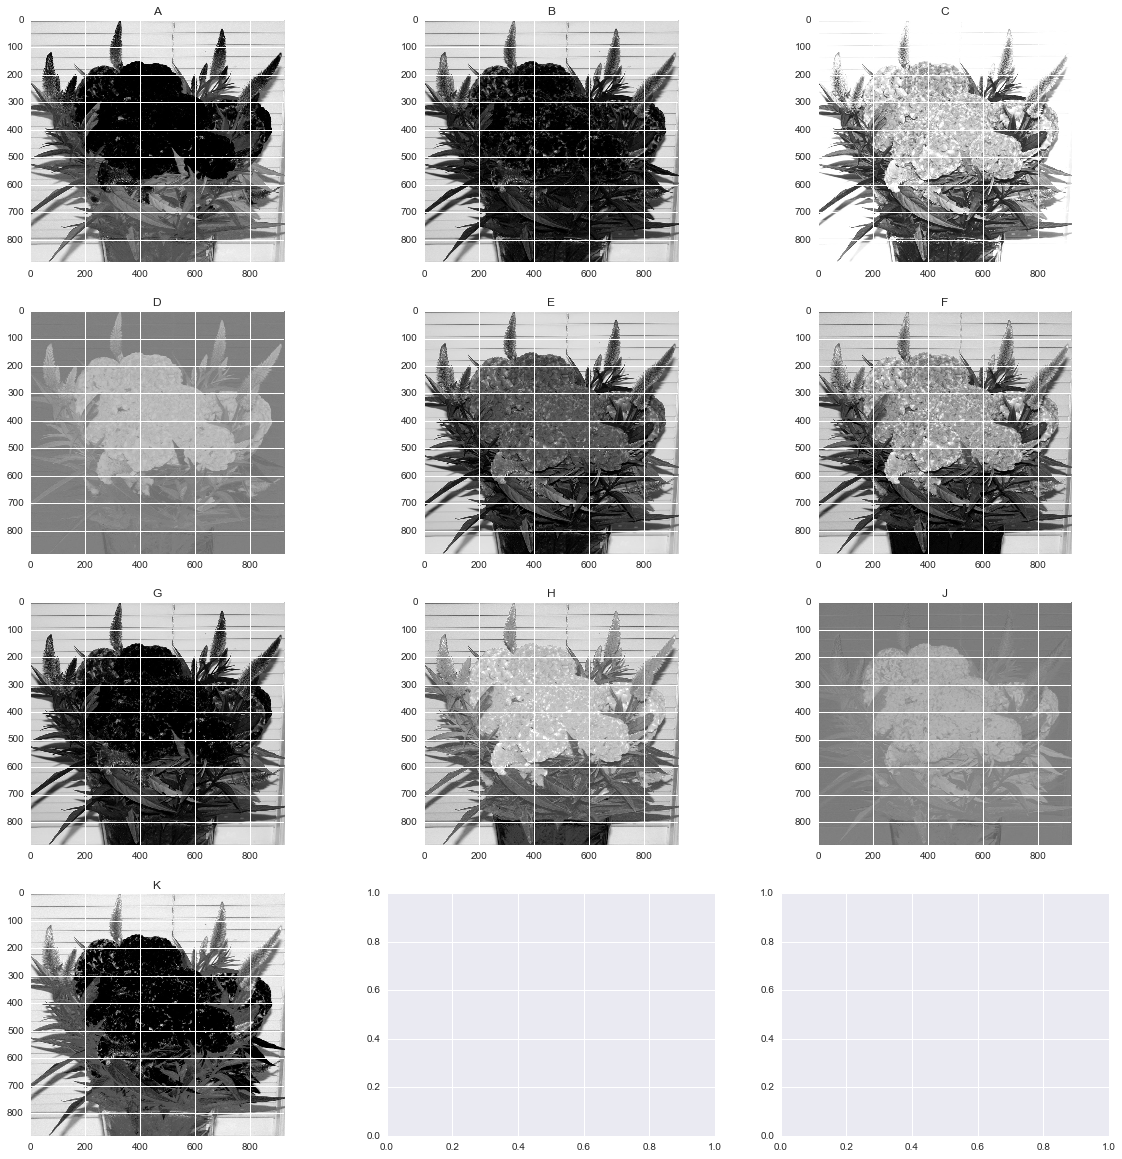

In [4]:
f, axarr = plt.subplots(4, 3, figsize=(20,20))
axarr[0,0].imshow(plt.imread('./res/exp/m.jpg'), cmap = plt.get_cmap('gray'), vmin = 0, vmax = 255)
axarr[0,0].set_title('A')

axarr[0,1].imshow(plt.imread('./res/exp/blue.jpg'), cmap = plt.get_cmap('gray'), vmin = 0, vmax = 255)
axarr[0,1].set_title('B')

axarr[0,2].imshow(plt.imread('./res/exp/k.jpg'), cmap = plt.get_cmap('gray'), vmin = 0, vmax = 255)
axarr[0,2].set_title('C')

axarr[1,0].imshow(plt.imread('./res/exp/a.jpg'), cmap = plt.get_cmap('gray'), vmin = 0, vmax = 255)
axarr[1,0].set_title('D')

axarr[1,1].imshow(plt.imread('./res/exp/l.jpg'), cmap = plt.get_cmap('gray'), vmin = 0, vmax = 255)
axarr[1,1].set_title('E')

axarr[1,2].imshow(plt.imread('./res/exp/red.jpg'), cmap = plt.get_cmap('gray'), vmin = 0, vmax = 255)
axarr[1,2].set_title('F')

axarr[2,0].imshow(plt.imread('./res/exp/green.jpg'), cmap = plt.get_cmap('gray'), vmin = 0, vmax = 255)
axarr[2,0].set_title('G')

axarr[2,1].imshow(plt.imread('./res/exp/c.jpg'), cmap = plt.get_cmap('gray'), vmin = 0, vmax = 255)
axarr[2,1].set_title('H')

axarr[2,2].imshow(plt.imread('./res/exp/b.jpg'), cmap = plt.get_cmap('gray'), vmin = 0, vmax = 255)
axarr[2,2].set_title('J')

axarr[3,0].imshow(plt.imread('./res/exp/y.jpg'), cmap = plt.get_cmap('gray'), vmin = 0, vmax = 255)
axarr[3,0].set_title('K')

#### 分析
花的叶子一般是绿色。

##### LAB
L 相当于原图的黑白照片，难以确定是 E 还是 F。

a 和 b 只有颜色信息，一般是灰蒙蒙的，所以是 D 和 J。     
其中，a 是绿色-品红，叶子细节更详细，所以是 D。    
而 b 是蓝色-黄色，叶子应该是中性色，所以是 J。    
结合 a 和 b 可知，花中有大量的品红(红+蓝）和黄色(红+绿），所以花的颜色中红色成分有很大占比。 

L - ?;  a - D;  b - J

##### RGB  和 CMYK
K 是黑色，一般是骨架轮廓，对比鲜明，所以是 C.

花偏红，R 红光多，C 青色颜料少，所以花的灰值应该偏白，所以是 F 和 H。$\to$ L - E。    
一般来说，因为 K 拿走部分对比，所以 CMYK 偏白， RGB 细节和对比更丰富，所以 R - F, C - H。

叶子绿色，所以 G 绿光多 和 M 品红颜料少，第一眼应该是 A 和 K，明暗比较一致。   
但仔细观察 K ，其叶子几乎没有对比，特别是观察 y 坐标 0 - 200 图像的浓淡趋势，其实 A 和 G 才是一对。    
G 明显比 A 黑很多，所以 G - G, M - A。

花和叶子中蓝色均较少，剩下的 B 和 K 基本都是块状图形，对比很浅，     
B 明显较 K 黑，   
所以 B - B, Y - K。

总结：  

序号 | 颜色分量 
-----|--------
A | M 品红   
B | B 蓝
C | K 黑
D | a 
E | L
F | R 红
G | G 绿
H | C 青
J | b
K | Y 黄


这个测试真得挺难，反复推究几次，对颜色空间的理解会增加不少。

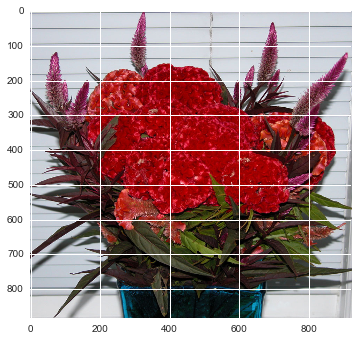

In [5]:
plt.imshow(plt.imread('./res/CD_Fig_1-5_original_color.jpg'))

### 1.9 区分通道
#### 1.10 何时两种效果最佳
##### 色光三原色混合原理     
蓝光和绿光是最大值时，红光若是最大值，则是白光；红光若低于最大值，则是蓝绿色，而不会显现红色。      
只有蓝和绿小于红时，混合时才会显现出红色。


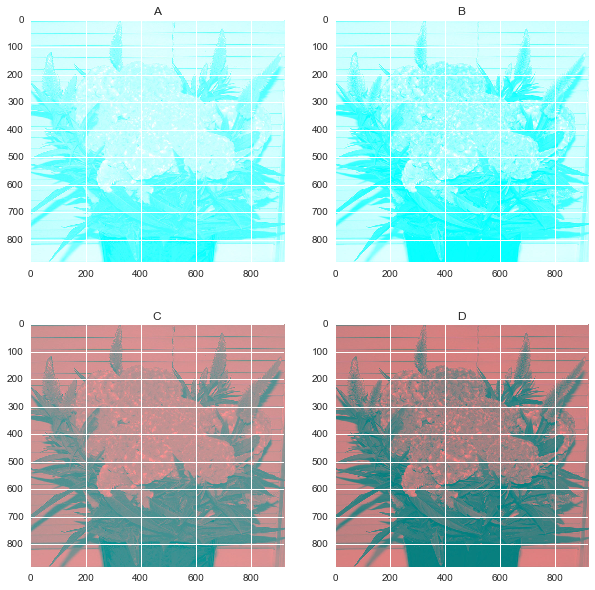

In [7]:
f, axarr = plt.subplots(2, 2, figsize=(10,10))
axarr[0,0].imshow(plt.imread('./res/exp1_8/A.jpg'))
axarr[0,0].set_title('A')

axarr[0,1].imshow(plt.imread('./res/exp1_8/B.jpg'))
axarr[0,1].set_title('B')

axarr[1,0].imshow(plt.imread('./res/exp1_8/C.jpg'))
axarr[1,0].set_title('C')

axarr[1,1].imshow(plt.imread('./res/exp1_8/D.jpg'))
axarr[1,1].set_title('D')

编号 |  模式 | 配比
-----|------|----
A | CMYK | C + 0%M + 0%Y + 0%K
B | RGB | R + 100%G + 100%B
C | CMYK | C + 50%M + 50%Y + 0%K
D | RGB | R + 50%G + 50%B

注：通道灰度调整：Photoshop 里在相应通道，全选图像，然后 Edit - Fill 选择 50% Gray 即可。

理论上说， RGB 和 CMY 是互补色，所以 1.8 A 和 1.8 B 应该是相同的，但观察花，红色通道比青色通道有更多细节。    
因为另外两通道是最大值，所以两张图均是蓝绿色，而不显红色。

1.8 C 和 D 分别在通道中加入 50% 灰，花的地方红色大于蓝和绿，显现红色。同理，白色部分红大于蓝绿，也显现红色。而叶子是深绿色，红色较少，低于蓝绿，所以仍然不显红色。（前面说过的色光混合原理）。

最后，观察白色背景部分，CMYK 背景较 RGB 背景偏暧。

#### 1.11 绿色通道的重要性

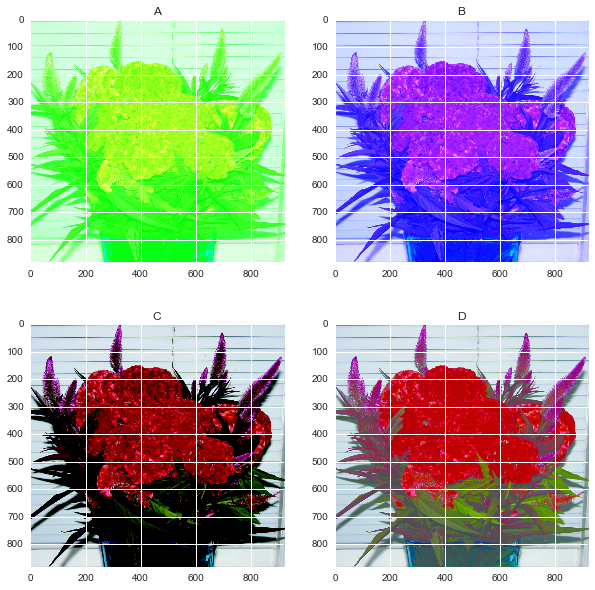

In [8]:
f, axarr = plt.subplots(2, 2, figsize=(10,10))
axarr[0,0].imshow(plt.imread('./res/exp1_9/A.jpg'))
axarr[0,0].set_title('A')

axarr[0,1].imshow(plt.imread('./res/exp1_9/B.jpg'))
axarr[0,1].set_title('B')

axarr[1,0].imshow(plt.imread('./res/exp1_9/C.jpg'))
axarr[1,0].set_title('C')

axarr[1,1].imshow(plt.imread('./res/exp1_9/D.jpg'))
axarr[1,1].set_title('D')

##### 陌生的通道，陌生的明度
1.9 A 是将蓝色通道复制到蓝色通道， B 是将蓝色通道复制到绿色通道。    
可以看到，同样的信息，在绿色通道里明暗变化更剧烈，对比更强烈。     
结论是：**绿色通道的细节非常重要**.

1.9 C 是原图的 CMYK 结果，D 是去掉了黑色通道的效果。     
可以看到黑墨对暗部细节的影响。

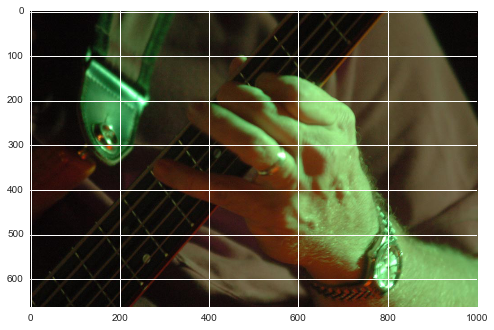

In [9]:
plt.imshow(plt.imread('./res/CD_Fig_1-10_guitarist.jpg'))

对付严重色偏：通道混合。